In [8]:
import os
import numpy as np
import cv2
import keras.utils 
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math
import pandas as pd

In [9]:
def load_pickle(path_file):
    with open(path_file,'rb') as f:
        data = pickle.load(f)
    return data
def get_labels_name():
    """
    get labels' name
    """
    labels_name =[]
    sign_nanme_csv = pd.read_csv(r"..\sign_name.csv",delimiter=';')
    labels_name = sign_nanme_csv['SignName']
    labels_name=np.asarray(labels_name)
    return labels_name

In [10]:
# path_file =r"..\data_enhancement\crop\data_crop_color.p"
# # path_file = r"..\mydata_crop.p"
# data = load_pickle(path_file)
# print("load data done")



In [24]:
def read_data(pickle_fn):
    if os.path.isfile(pickle_fn):
        data= pickle.load(open(pickle_fn,'rb'))
        print(f'done read_dataa from {pickle_fn}')
        return data
    else:
        raise Exception("the file data enhancement is not found")
data = read_data(r"C:\Users\BuiHoang\traffic_sign_project\data_enhancement\data_3009_processed_gray_norm.p");


done read_dataa from C:\Users\BuiHoang\traffic_sign_project\data_enhancement\data_3009_processed_gray_norm.p


dict_keys(['ims', 'lbs'])
ims  shape: (146545, 32, 32, 1)
lbs shape: (146545, 43)
[3120 3120 3240 3000 4140 2940 3120 3600 2940 3445 3120 3120 3150 2970
 3240 3120 3000 3000 2970 3060 3120 2970 3240 2940 3600 3330 2940 3150
 3120 4320 4200 3960 4020 2940 4230 4320 2940 3720 3960 4230 4500 4440
 2940]


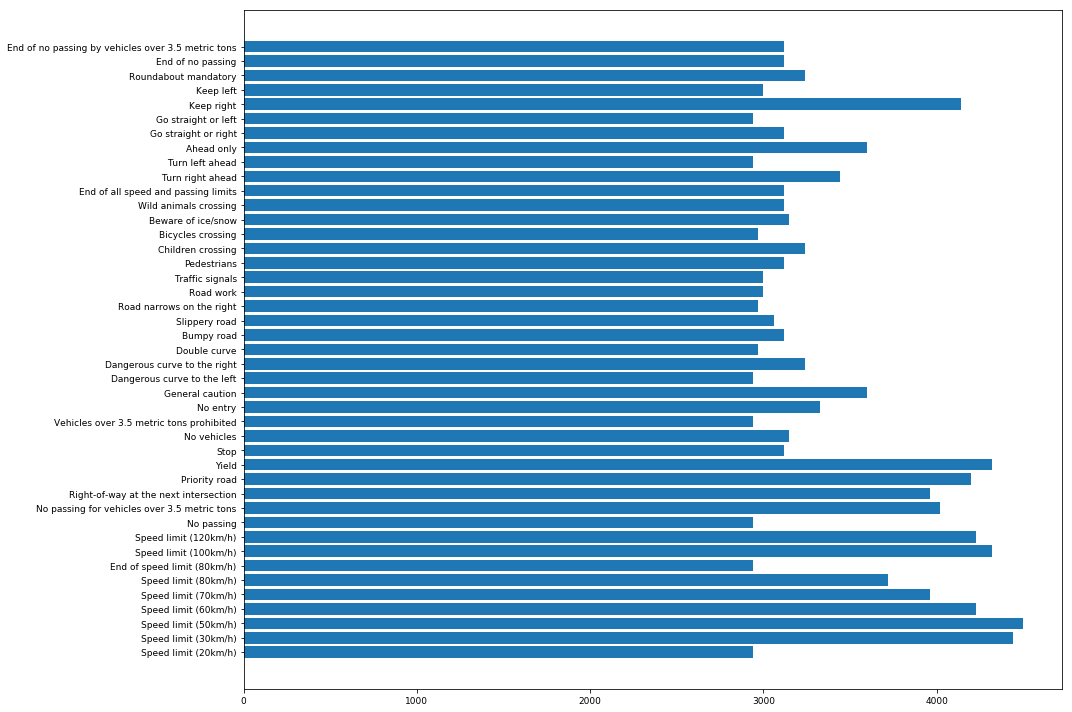

In [26]:

print(data.keys())
ims = data['ims']
lbs = data['lbs']
# print(lbs[0:10])
# num_class = data['num_class']
lbs_name = get_labels_name();
print(f"ims  shape: {ims.shape}")
print(f"lbs shape: {lbs.shape}")
# print(f"num class: {num_class}")
# print(f"lbs_name: {lbs_name.shape}")
# neu lbs is onehot
lbs = np.argmax(lbs, axis=1)
lbs = lbs[:].astype(int)
num_of_sample_per_class = np.bincount(lbs)
print(num_of_sample_per_class[::-1])


def plot_data_distribution(lbs,lbs_name):
    plt.figure(figsize=(15, 10))
    num_of_sample_per_class = np.bincount(lbs)
    y_pos = np.arange(len(lbs_name))
    plt.barh(y_pos, num_of_sample_per_class)
    plt.yticks(y_pos, lbs_name)
    ax = plt.gca()
    ax.tick_params(axis='x', which='both', labelsize=9)
    ax.tick_params(axis='y', which='both', labelsize=9)
    plt.gcf().tight_layout()
    plt.show()
plot_data_distribution(lbs,lbs_name)


In [18]:
lbs.shape

(146545, 43)